# Neural Network

## Optimization Basics: Gradient Descent

Let's put the "sample problem" aside for now, and talk about the general problem of optimization.   Often we may wish to minimize some function $f(x)$.  In science, doing so may enable us to fit a curve to our data, as we'll do below.   Similarly,'machine learning' systems often operate on the basis of minimizing a 'cost' function to discern patterns in complex datasets.  


Thus we want to find the value of $x$ for which $f(x)$ is the smallest.  A graph of such a function might look like this...

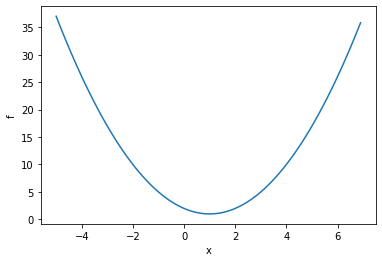

In [1]:
#https://drscotthawley.github.io/blog/2017/02/23/Following-Gravity-Colab.html

import numpy as np, matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x = np.arange(-5,7,0.1)
ax.plot(x,(x-1)**2+1)
plt.show()

If $f(x)$ is differentiable and the derivative (*i.e.*, slope) $\frac{df}{dx}$ can be evaluated easily, then we can perform a so-called "gradient descent".  

We do so as follows:

1. Start with some initial guess for $x$
2. "Go in the direction of  $-df/dx$":
$$x_{new} = x_{old} - \alpha {df\over dx},$$
where $\alpha$ is some parameter often called the "learning rate".  All this equation is saying is, "If the function is increasing, then move to the left; and if the function is decreasing then move to the right."  The actual change to $x$ is given by $\Delta x \equiv - \alpha (df/dx)$.    
3. Repeat step 2 until some approximation criterion is met.

A nice feature of this method is that as $\frac{df}{dx} \rightarrow 0$, so too $\Delta x\rightarrow0$.  So an "adaptive stepsize" is built-in.

alpha =  0.002
              final x =  -3.910414704056598
alpha =  0.1
              final x =  0.9999143651384377
alpha =  0.25
              final x =  0.9999999999999947
alpha =  0.8
              final x =  0.999999999951503


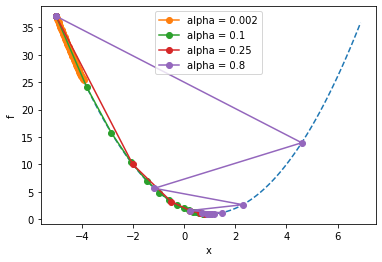

In [2]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)

fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x = np.arange(-5,7,0.1)
ax.plot(x,f(x),ls='dashed')

for alpha in ([0.002,0.1,0.25,0.8]):
    print("alpha = ",alpha)
    x = -5                           # starting point
    x_arr = [x]
    y_arr = [f(x)]
    maxiter = 50
    for iter in range(maxiter):	     # do the descent
        # these two lines are just for plotting later
        x_arr.append(x)
        y_arr.append( f(x) )

        # Here's the important part: update via gradient descent
        x = x - alpha * dfdx(x)

    # report and make the plot
    print("              final x = ",x)
    ax.plot(x_arr,y_arr,'o-',label="alpha = "+str(alpha))


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

### Challenge: Instability

You may have noticed, if you made the learning rate too large, that the algorithm does *not* converge to the solution but instead 'blows up'.   This is the 'flip side' of the 'adaptive step size' feature of this algorithm:  If you jump "across" the minimum to the other side and end up a greater distance from the minimum that where you started, you will encounter an even larger gradient, which will lead to an even larger $\Delta x$, and so on.

We can see this with the same code from before, let's just use a different starting point and a step size that's clearly too large...

alpha =  1.1
              final x =  -16.83220089651204


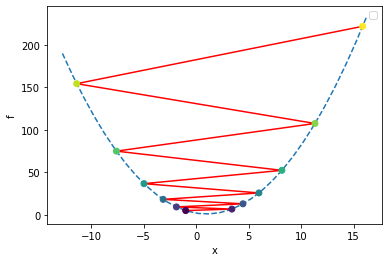

In [3]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)

alpha = 1.1                     # "too big" learning rate

print("alpha = ",alpha)
x = -1                           # starting point
x_arr = []
y_arr = []
maxiter = 12
for iter in range(maxiter):	     # do the descent
    x_arr.append(x)
    y_arr.append( f(x) )
    x = x - alpha * dfdx(x)

# report and make the plot
print("              final x = ",x)
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
plt.plot(x_arr,y_arr,'r',zorder=2,)
plt.scatter(x_arr,y_arr,zorder=3,c=range(len(x_arr)),cmap=plt.cm.viridis)
xlim = ax.get_xlim()                   # find out axis limits
x = np.arange(xlim[0],xlim[1],1)       # dashed line
plt.plot(x,f(x),zorder=1,ls='dashed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

One way to guard against this to check: is our value of $f(x)$ at the current iteration *larger* than the value it was at the previous iteration?  If so, that's a sign that our learning rate is too large, and we can use this criterion to dynamically adjust the learning rate.  

Let's add some 'control' code to that effect, to the previous script, and also print out the values of the relevant variables so we can track the progress:

alpha =  13.0
iter =  0 x =  -1 f(x) = 5 alpha =  13.0
iter =  1 x =  51.0 f(x) = 2501.0 alpha =  13.0
 decreasing alpha. new alpha =  6.5
iter =  2 x =  -599.0 f(x) = 360001.0 alpha =  6.5
 decreasing alpha. new alpha =  3.25
iter =  3 x =  3301.0 f(x) = 10890001.0 alpha =  3.25
 decreasing alpha. new alpha =  1.625
iter =  4 x =  -7424.0 f(x) = 55130626.0 alpha =  1.625
 decreasing alpha. new alpha =  0.8125
iter =  5 x =  4641.625 f(x) = 21535401.390625 alpha =  0.8125
iter =  6 x =  -2899.390625 f(x) = 8412266.77758789 alpha =  0.8125
iter =  7 x =  1813.744140625 f(x) = 3286042.31937027 alpha =  0.8125
iter =  8 x =  -1131.965087890625 f(x) = 1283610.8903790116 alpha =  0.8125
iter =  9 x =  709.1031799316406 f(x) = 501411.1134293014 alpha =  0.8125
iter =  10 x =  -441.5644874572754 f(x) = 195864.32555832085 alpha =  0.8125
iter =  11 x =  277.6028046607971 f(x) = 76510.1115462191 alpha =  0.8125
iter =  12 x =  -171.8767529129982 f(x) = 29887.37169774183 alpha =  0.8125
iter =  

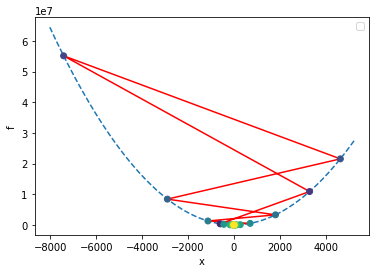

In [4]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)


alpha = 13.0                     # "too big" learning rate

print("alpha = ",alpha)
x = -1                           # starting point
x_arr = []
y_arr = []
maxiter = 20
f_old = 1e99   # some big number
for iter in range(maxiter):	     # do the descent
    # these two lines are just for plotting later
    x_arr.append(x)

    f_cur = f(x)
    y_arr.append( f_cur )
    
    print("iter = ",iter,"x = ",x,"f(x) =",f(x),"alpha = ",alpha)
    
    if (f_cur > f_old):         # check for runaway behavior
        alpha = alpha * 0.5
        print(" decreasing alpha. new alpha = ",alpha)
    f_old = f_cur
    
    # update via gradient descent
    x = x - alpha * dfdx(x)

# report and make the plot
print("              final x = ",x)
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
plt.plot(x_arr,y_arr,'r',zorder=2,)
plt.scatter(x_arr,y_arr,zorder=3,c=range(len(x_arr)),cmap=plt.cm.viridis)
xlim = ax.get_xlim()
x = np.arange(xlim[0],xlim[1],1)          # x for dashed line
plt.plot(x,f(x),zorder=1,ls='dashed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

### Challenge: Non-global minima
To explore more complicated functions, we're going to take advantage of the SymPy package, to let it take derivatives for us.  Try executing the import in the next cell, and if nothing happens it means you have SymPy installed.  If you get an error, you may need to go into a Terminal and run "`pip install sympy`". 

alpha =  0.002
              final xval =  4.02939564594151
alpha =  0.01
              final xval =  4.02896613891181
alpha =  0.03
              final xval =  -2.00328879556504


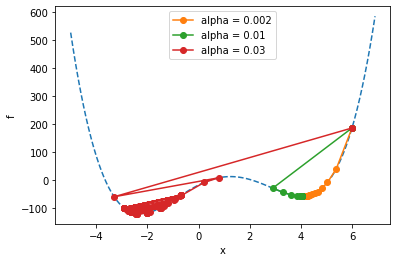

In [8]:
import sympy

from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt
from sympy import Symbol, diff

x = Symbol('x')

# our function, more complicated (SymPy handles it!)
f = (x-1)**4 - 20*(x-1)**2 + 10*x + 1
dfdx = diff(f,x)

# setup
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x_arr = np.arange(-5,7,0.1)
y_arr = np.copy(x_arr)
for i, val in enumerate(x_arr):
    y_arr[i] = f.evalf(subs={x:val})
ax.plot(x_arr,y_arr,ls='dashed')   # space of 'error function'

# for a variety of learning rates...
for alpha in ([0.002,0.01,0.03]): 
    print("alpha = ",alpha)
    xval = 6                     # starting point
    x_arr = [xval]
    y_arr = [f.evalf(subs={x:xval})]

    maxiter = 50
    # do the descent
    for iter in range(maxiter):

        # these two lines are just for plotting later
        x_arr.append(xval)
        y_arr.append( f.evalf(subs={x:xval}) )

        # update via gradient descent
        xval = xval - alpha * dfdx.evalf(subs={x:xval})
        
    print("              final xval = ",xval)
    ax.plot(x_arr,y_arr,'o-',label="alpha = "+str(alpha))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

All the runs start at $x=6$.  Notice how the runs marked in organge and green go on to find a "local" minimum, but they don't find the "global" minimum (the overall lowest point) like the run marked in red does.  The problem of ending up at non-global local minima is a generic problem for all kinds of optimization tasks.  It tends to get even worse when you add more parameters...

## Least Squares Regression


This is such a common thing to do in science and statistics, that everyone should learn how it works.  We'll do it for linear relationships, but it generalizes to nonlinear situations as well.



### How to Fit a Line

Let's say we're trying to fit a line to a bunch of data.  We've been given $n$ data points with coordinates $(x_i,y_i)$ where $i=1..n$.  The problem becomes, given a line $f(x) = mx+b$, find the values of the parameters $m$ and $b$ which minimize the overall "error".

#### add some kinda picture here?

The error can take many forms; one is the squared error $SE$, which is just the sum of the squares of the "distances" between each data point's $y$-value and the "guess" from the line fit $f$ at each value of $x$:

$$ SE = (f(x_1) - y_1)^2 + (f(x_2) - y_2)^2 + ... (f(x_n)-y_n)^2,$$

We can write this concisely as
$$ SE = \sum_{i=1}^n (f(x_i)-y_i)^2.$$

Another popular form is the "mean squared error" $MSE$, which is just $SE/n$:

$$ MSE = {1\over n}\sum_{i=1}^n (f(x_i)-y_i)^2.$$

The MSE has the nice feature that as you add more data points, it tends to hold a more-or-less consistent value (as opposed to the SE which gets bigger as you add more points).  We'll use the MSE in the work that follows.

So expanding out $f(x)$, we see that the MSE is a function of $m$ and $b$, and these are the parameters we'll vary to minimize the MSE:
$$ MSE(m,b) = {1\over n}\sum_{i=1}^n (mx_i+b-y_i)^2.$$

So, following our earlier work on multidimensional optimization, we start with guesses for $m$ and $b$ and then update according to gradient descent:

$$m_{new} = m_{old} + \Delta m,\ \ \ \ \ \ \Delta m = -\alpha{\partial (MSE)\over\partial m} = -\alpha{2\over n}\sum_{i=1}^n (mx_i+b-y_i)(x_i) $$
$$b_{new} = b_{old} + \Delta b,\ \ \ \ \ \ \Delta b =  -\alpha{\partial (MSE)\over\partial b} = -\alpha{2\over n}\sum_{i=1}^n (mx_i+b-y_i)(1).$$

So, to start off, let's get some data...

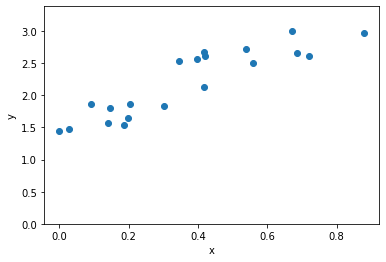

In [9]:
# Set up the input data
n = 20
np.random.seed(1)               # for reproducability 
x_data = np.random.uniform(size=n)   # random points for x
m_exact = 2.0
b_exact = 1.5
y_data = m_exact * x_data + b_exact
y_data += 0.3*np.random.normal(size=n)   # add noise

# Plot the data
def plot_data(x_data, y_data, axis_labels=('x','y'), zero_y=False):
    fig, ax = plt.subplots()
    ax.update({'xlabel':axis_labels[0], 'ylabel':axis_labels[1]})
    ax.plot(x_data, y_data,'o')
    if (zero_y):
        ax.set_ylim([0,ax.get_ylim()[1]*1.1])
    plt.show()
    
plot_data(x_data,y_data, zero_y=True)

/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_6682/2596006420.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)


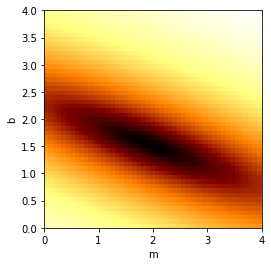

In [10]:
# map out the MSE for various values of m and b
def MSE(x,y,m,b):
    # Use Python array operations to compute sums
    return ((m*x + b - y)**2).mean()  

mm = bb = np.linspace(0, 4, 50)
z = np.zeros([len(mm), len(bb)])
for i in range(len(mm)):
    for j in range(len(bb)):
        z[j, i] = MSE(x_data,y_data, mm[i],bb[j])
        
fig, ax = plt.subplots()
ax.update({'xlabel':'m', 'ylabel':'b'})
cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

0 : b, m =  3.5 3.5 , MSE =  6.867803311857804
4 : b, m =  2.073776144574949 2.8989088276377704 , MSE =  0.9822230659297425
8 : b, m =  1.5596642386263782 2.663107500815331 , MSE =  0.19487432595552726
12 : b, m =  1.3781192855319764 2.5612819463332284 , MSE =  0.08779470612766216
16 : b, m =  1.3176768537458754 2.508997692141277 , MSE =  0.07187286820691954
20 : b, m =  1.3011842150503707 2.4754176246747877 , MSE =  0.06836272410861176
24 : b, m =  1.3004983887849229 2.449263363086375 , MSE =  0.06666658397061724
28 : b, m =  1.3053595793779738 2.426394559496536 , MSE =  0.06532866359184891
32 : b, m =  1.3120331485048708 2.4052765561752345 , MSE =  0.06413460502013199
36 : b, m =  1.3191651008669785 2.3853264964527368 , MSE =  0.06304419876994968
40 : b, m =  1.3262697716712815 2.3663097816761587 , MSE =  0.06204388370655647
44 : b, m =  1.333178000670531 2.3481197998601546 , MSE =  0.06112519204164951
48 : b, m =  1.339835785962148 2.3306975113390367 , MSE =  0.06028118219832259
52 

/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_6682/1608849148.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)


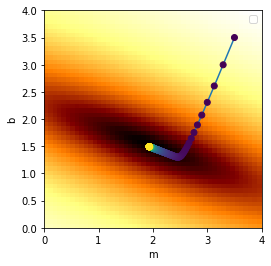

In [11]:
m = 3.5         # initial guess
b = 3.5 
m_arr = []
b_arr = []

def dMSEdm(x,y,m,b):
    return (2*(m*x + b - y) *x).mean()

def dMSEdb(x,y,m,b):
    return (2*(m*x + b - y)).mean()

alpha = 0.1
maxiter, printevery = 500, 4
for iter in range(maxiter):
    m_arr.append(m)
    b_arr.append(b)
    if (0 == iter % printevery):
        print(iter,": b, m = ",b,m,", MSE = ",MSE(x_data,y_data,m,b))
    
    m = m - alpha * dMSEdm(x_data,y_data,m,b)
    b = b - alpha * dMSEdb(x_data,y_data,m,b)
    
print("Final result: m = ",m,", b = ",b)

# background image: plot the color background (remembered from before)
fig, ax = plt.subplots()
ax.update({'xlabel':'m', 'ylabel':'b'})
cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')

# plot the progress of our descent
plt.plot(m_arr,b_arr,zorder=1)
plt.scatter(m_arr,b_arr,zorder=2,c=range(len(m_arr)),cmap=plt.cm.viridis)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

*Note that the optimized values $(m,b)$ that we find may not exactly match the "exact" values we used to make the data, because the noise we added to the data can throw this off.  In the limit where the noise amplitude goes to zero, our optimized values will exactly match the "exact" values used to generated the data.*

Let's see the results of our line fit...

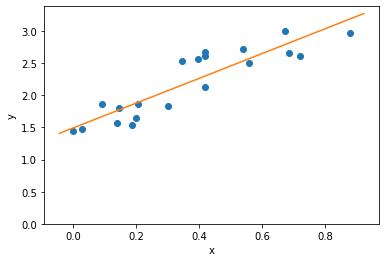

In [12]:
# plot the points
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'y'})
ax.plot(x_data,y_data,'o')
ax.set_ylim([0,ax.get_ylim()[1]*1.1])

# and plot the line we fit
xlim = ax.get_xlim()
x_line = np.linspace(xlim[0],xlim[1],2)
y_line = m*x_line + b
ax.plot(x_line,y_line)
plt.show()

### Least Squares Fitting with Nonlinear Functions

We can generalize the technique describe above to fit polynomials 
$$ f(x) = c_0 + c_1 x + c_2 x^2 + ...c_k x^k,$$
where $c_0...c_k$ are the parameters we will tune, and $k$ is the order of the polynomial. (Typically people use the letter $a$ for polynomial coefficients, but in the math rendering of Jupter, $\alpha$ and $a$ look too much alike, so we'll use $c$.) Written more succinctly,
$$ f(x) = \sum_{j=0}^k c_j x^j.$$

(Indeed, we could even try non-polynomial basis functions, e.g.,
$ f(x) = c_0 + c_1 g(x) + c_2 h(x) + ...,$
but let's stick to polynomials for now.)

The key thing to note is that for each parameter $c_j$, the update $\Delta c_j$ will be

$$\Delta c_j = -\alpha {\partial (MSE)\over \partial c_j} 
= -\alpha {\partial (MSE)\over \partial f}{\partial f\over \partial c_j}$$
$$= -\alpha {2\over n}\sum_{i=1}^n [f(x_i)-y_i](x_i)^{j} $$


*(Note that we are not taking the derivative with respect to $x_i$, but rather with respect to $c_j$.  Thus there is no "power rule" that needs be applied to this derivative.  Also there is no sum over j.)*

The following is a complete code for doing this, along with some added refinements:

* $\alpha$ is now $\alpha_j$, i.e. different learning rates for different directions
* we initialise $\alpha_j$ such that larger powers of $x$ start with smaller coefficients
* we put the fitting code inside a method (with a bunch of parameters) so we can call it later

               Initial guess:    c =  [-3.52 -2.64  4.4   0.44 -1.76  0.44]
     Notice: decreasing alpha[ 3 ] to  0.00729
     Notice: decreasing alpha[ 4 ] to  0.0021869999999999997
     Notice: decreasing alpha[ 5 ] to  0.0006560999999999998
   0/500: MSE =  258.233, c = [-5.438 -1.633  4.24   0.555 -1.904  0.765]
     Notice: decreasing alpha[ 5 ] to  0.00019682999999999994
  25/500: MSE = 0.529541, c = [-4.265 -1.545  5.668 -0.392 -2.146  0.612]
  50/500: MSE = 0.424417, c = [-4.304 -1.808  5.659 -0.241 -2.137  0.595]
  75/500: MSE = 0.335586, c = [-4.256 -2.034  5.552 -0.105 -2.115  0.578]
 100/500: MSE = 0.275848, c = [-4.212 -2.218  5.457  0.006 -2.096  0.564]
 125/500: MSE = 0.236521, c = [-4.175 -2.367  5.38   0.096 -2.08   0.553]
 150/500: MSE =  0.21068, c = [-4.146 -2.488  5.317  0.17  -2.068  0.544]
 175/500: MSE = 0.193702, c = [-4.122 -2.586  5.267  0.229 -2.058  0.537]
 200/500: MSE = 0.182549, c = [-4.103 -2.665  5.226  0.277 -2.049  0.531]
 225/500: MSE = 0.175222, c

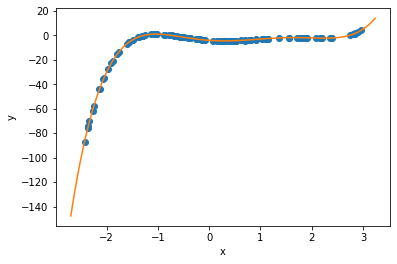

In [13]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x,c):
    y = 0*x                    # f will work on single floats or arrays
    for j in range(c.size):
        y += c[j]*(x**j)
    return y

def polyfit(x_data,y_data, c_start=None, order=None, maxiter=500, printevery = 25,
            alpha_start=0.9, alpha_start_power=0.3):
    
    # function definitions

    def MSE(x_arr,y_arr,c):
        f_arr = f(x_arr,c)
        return ((f_arr - y_arr)**2).mean()

    def dMSEdcj(x_arr,y_arr,c,j):  # deriviative of MSE wrt cj (*not* wrt x!)
        f_arr = f(x_arr,c)
        return ( 2* ( f_arr - y_arr) * x_arr**j ).mean()  

    if ((c_start is None) and (order is None)):
        print("Error: Either specify initial guesses for coefficients,",
              "or specify the order of the polynomial")
        raise  # halt
        
    if c_start is not None:
        order = c_start.size-1
        c = np.copy(c_start)
    elif order is not None:
        c = np.random.uniform(size=order+1)     # random guess for starting point

    assert(c.size == order+1)             #  check against conflicting info
    k = order
        
    print("               Initial guess:    c = " ,np.array_str(c, precision=2))
    
    alpha = np.ones(c.size)
    for j in range(c.size):             # start with smaller alphas for higher powers of x
        alpha[j] = alpha_start*(alpha_start_power)**(j)   

    MSE_old = 1e99
    for iter in range(maxiter+1):           # do the descent
        for j in range(c.size): 
            c[j] = c[j] - alpha[j] * dMSEdcj(x_data,y_data,c,j)
            
            MSE_cur = MSE(x_data,y_data,c)
            if (MSE_cur > MSE_old):         # adjust if runaway behavior starts
                alpha[j] *= 0.3
                print("     Notice: decreasing alpha[",j,"] to ",alpha[j])
            MSE_old = MSE_cur

        if (0 == iter % printevery):        # progress log
            print('{:4d}'.format(iter),"/",maxiter,": MSE =",'{:9.6g}'.format(MSE_cur),
                 ", c = ",np.array_str(c, precision=3),sep='')
    print("")
    return c

# Set up input data 
n = 100 
np.random.seed(2)                                 # for reproducability 
x_data = np.random.uniform(-2.5,3,size=n)       # some random points for x
c_data = np.array([-4,-3,5,.5,-2,.5])           # params to generate data (5th-degree polynomial)
y_data = f(x_data, c_data)
y_data += 0.02*np.random.normal(size=n)*y_data    # add a (tiny) bit of noise

#---- Perform Least Squares Fit 
c = polyfit(x_data, y_data, c_start=c_data*np.random.random(), maxiter=500)

#----- Plot the results
def plot_data_and_curve(x_data,y_data,axis_labels=('x','y'), ):
    # plot the points
    fig, ax = plt.subplots()
    ax.update({'xlabel':axis_labels[0], 'ylabel':axis_labels[1]})
    ax.plot(x_data,y_data,'o')

    # and plot the curve we fit
    xlim = ax.get_xlim()
    x_line = np.linspace(xlim[0],xlim[1],100)
    y_line = f(x_line, c)
    ax.plot(x_line,y_line)
    plt.show()

plot_data_and_curve(x_data,y_data)